#Library

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
import datetime
from dateutil.parser import parse

import IPython

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import adfuller
from scipy.stats import norm

#General function

## Plot histogram

In [ ]:
def plot_hist(df, column_name, x_label, y_label, bins = 40, title = ""):
  ax = df.hist(column=column_name, bins=bins, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

  ax = ax[0]
  for x in ax:

      # Despine
      x.spines['right'].set_visible(False)
      x.spines['top'].set_visible(False)
      x.spines['left'].set_visible(False)

      # Switch off ticks
      x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

      # Draw horizontal axis lines
      vals = x.get_yticks()
      for tick in vals:
          x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

      # Remove title
      x.set_title(title)

      # Set x-axis label
      x.set_xlabel(x_label, labelpad=20, weight='bold', size=12)

      # Set y-axis label
      x.set_ylabel(y_label, labelpad=20, weight='bold', size=12)


## Plot line

In [ ]:
def plot_line(df, column_name, x_label, y_label, title=''):
  ax = df.plot(y = column_name, grid=False, figsize=(12,8), color='#86bf91', label='_nolegend_')
  
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)

  # Switch off ticks
  ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", left="off", right="off", labelleft="off")

  ax.set_title(title)

  # Set x-axis label
  ax.set_xlabel(x_label, labelpad=20, weight='bold', size=12)

  # Set y-axis label
  ax.set_ylabel(y_label, labelpad=20, weight='bold', size=12)

# 0. Data Preprocessing

In [ ]:
# Run this block to mount on drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Project/2022 - COMAP/data")
print(os.getcwd())

/content/drive/MyDrive/Project/2022 - COMAP/data


## Import data

In [ ]:
df = pd.read_csv("BCHAIN-MKPRU.csv")

In [ ]:
df

,Date,Value
0,9/11/16,621.65
1,9/12/16,609.67
2,9/13/16,610.92
3,9/14/16,608.82
4,9/15/16,610.38
...,...,...
1821,9/6/21,51769.06
1822,9/7/21,52677.40
1823,9/8/21,46809.17
1824,9/9/21,46078.38


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)

In [ ]:
df

,Date,Value
0,2016-11-09,621.65
1,2016-12-09,609.67
2,2016-09-13,610.92
3,2016-09-14,608.82
4,2016-09-15,610.38
...,...,...
1821,2021-06-09,51769.06
1822,2021-07-09,52677.40
1823,2021-08-09,46809.17
1824,2021-09-09,46078.38


In [ ]:
df = df.set_index('Date')

In [ ]:
df['return_price'] = df['Value'].pct_change()
df['log_return'] = np.log(df.Value / df.Value.shift(1))
df['log_price'] = np.log(df['Value'])

#unit root property
value_adfuller = adfuller(df.Value.dropna(),maxlag=50)
tau_value = value_adfuller[0]
p_value = value_adfuller[1]

log_value_adfuller = adfuller(df.log_price.dropna(), maxlag=50)
tau_log_value = log_value_adfuller[0]
p_log_value = log_value_adfuller[1]

#IQR
IQR_value = df.Value.quantile(0.75) - df.Value.quantile(0.25)
IQR_return_value = df.return_price.quantile(0.75) - df.return_price.quantile(0.25)
IQR_log_return_value = df.log_return.quantile(0.75) - df.log_return.quantile(0.25)

In [ ]:
result = [tau_value, tau_log_value,p_value,p_log_value,
              df.Value.mean(), df.Value.std(), df.Value.mad(), df.Value.skew(), df.Value.kurtosis(),IQR_value,
              df.return_price.mean(), df.return_price.std(), df.return_price.mad(), df.return_price.skew(), df.return_price.kurtosis(),IQR_return_value,
              df.log_return.mean(), df.log_return.std(), df.log_return.mad(), df.log_return.skew(), df.log_return.kurtosis(),IQR_log_return_value]

In [ ]:
list_of_result = []

list_of_result.append(result)

In [ ]:
result = [tau_value, tau_log_value,p_value,p_log_value,
              df.Value.mean(), df.Value.std(), df.Value.mad(), df.Value.skew(), df.Value.kurtosis(),IQR_value,
              df.return_price.mean(), df.return_price.std(), df.return_price.mad(), df.return_price.skew(), df.return_price.kurtosis(),IQR_return_value,
              df.log_return.mean(), df.log_return.std(), df.log_return.mad(), df.log_return.skew(), df.log_return.kurtosis(),IQR_log_return_value]

In [ ]:
stat_df = pd.DataFrame(data=list_of_result,    # values
                  columns= ['tau_close', 'tau_log_close', 'p_close', 'p_log_close',
                  'mean_close', 'std_close', 'mad_close', 'skew_close', 'kurtosis_close', 'IQR_Close',
                  'mean_return_close', 'std_return_close', 'mad_return_close', 'skew_return_close', 'kurtosis_return_close', 'IQR_return_close',
                  'mean_log_return_close', 'std_log_return_close', 'mad_log_return_close', 'skew_log_return_close', 'kurtosis_log_return_close', 'IQR_log_return_close'])

In [ ]:
stat_df

,tau_close,tau_log_close,p_close,p_log_close,mean_close,std_close,mad_close,skew_close,kurtosis_close,IQR_Close,mean_return_close,std_return_close,mad_return_close,skew_return_close,kurtosis_return_close,IQR_return_close,mean_log_return_close,std_log_return_close,mad_log_return_close,skew_log_return_close,kurtosis_log_return_close,IQR_log_return_close
0,-0.904989,-1.52197,0.786325,0.522616,12206.068281,14043.891627,9575.27696,2.012681,3.094912,7089.7475,0.003235,0.041487,0.026671,-0.135007,7.944854,0.031596,0.002363,0.041886,0.026576,-0.91952,14.001736,0.031495


## Apply for all data

In [ ]:
# ticker, tau_close, p_close, tau_log_close, p_log_close, 
#         mad_close, mad_return, mad_log_return,  
#         IQR_close, IQR_return, IQR_log_return, 
#         mean_close, mean_return, mean_log_return,
#         skew_close
#           = ([] for i in range(7))

list_of_result = []

for name_ticker in list_of_stock:

    df = get_data_of_each_ticker(grouped_df, name_ticker)

    df['return_price'] = df['Close'].pct_change()
    df['log_return'] = np.log(df.Close / df.Close.shift(1))
    df['log_price'] = np.log(df['Close'])

    #unit root property
    close_adfuller = adfuller(df.Close.dropna(),maxlag=50)
    tau_close_value = close_adfuller[0]
    p_close_value = close_adfuller[1]

    log_close_adfuller = adfuller(df.log_price.dropna(), maxlag=50)
    tau_log_close_value = log_close_adfuller[0]
    p_log_close_value = log_close_adfuller[1]

    #IQR
    IQR_Close_value = df.Close.quantile(0.75) - df.Close.quantile(0.25)
    IQR_return_value = df.return_price.quantile(0.75) - df.return_price.quantile(0.25)
    IQR_log_return_value = df.log_return.quantile(0.75) - df.log_return.quantile(0.25)

    result = [name_ticker, tau_close_value, tau_log_close_value,p_close_value,p_log_close_value,
              df.Close.mean(), df.Close.std(), df.Close.mad(), df.Close.skew(), df.Close.kurtosis(),IQR_Close_value,
              df.return_price.mean(), df.return_price.std(), df.return_price.mad(), df.return_price.skew(), df.return_price.kurtosis(),IQR_return_value,
              df.log_return.mean(), df.log_return.std(), df.log_return.mad(), df.log_return.skew(), df.log_return.kurtosis(),IQR_log_return_value]

    list_of_result.append(result)

In [ ]:
df = pd.DataFrame(data=list_of_result,    # values
                  columns= ['ticker', 'tau_close', 'tau_log_close', 'p_close', 'p_log_close',
                  'mean_close', 'std_close', 'mad_close', 'skew_close', 'kurtosis_close', 'IQR_Close',
                  'mean_return_close', 'std_return_close', 'mad_return_close', 'skew_return_close', 'kurtosis_return_close', 'IQR_return_close',
                  'mean_log_return_close', 'std_log_return_close', 'mad_log_return_close', 'skew_log_return_close', 'kurtosis_log_return_close', 'IQR_log_return_close'])

In [ ]:
df.to_csv("financial_analysis.csv", float_format='%.8f', index = False)

In [ ]:
import statsmodels.api as sm

def test_stationarity_acf_pacf_plot(ts, sample=0.20, maxlag=30, figsize=(30,10)):
    with plt.style.context(style='bmh'):
        ## set figure
        fig = plt.figure(figsize=figsize)
        #fig.suptitle('ACF and PACF for {}'.format(ticker), size = 14)
        #ts_ax = plt.subplot2grid(shape=(2,2), loc=(0,0), colspan=2)
        pacf_ax = plt.subplot2grid(shape=(2,2), loc=(0,0))
        acf_ax = plt.subplot2grid(shape=(2,2), loc=(0,1))
        
        ## plot ts with mean/std of a sample from the first x% 
        # dtf_ts = ts.to_frame(name="ts")
        # sample_size = int(len(ts)*sample)
        # dtf_ts["mean"] = dtf_ts["ts"].head(sample_size).mean()
        # dtf_ts["lower"] = dtf_ts["ts"].head(sample_size).mean() + dtf_ts["ts"].head(sample_size).std()
        # dtf_ts["upper"] = dtf_ts["ts"].head(sample_size).mean() - dtf_ts["ts"].head(sample_size).std()
        # dtf_ts["ts"].plot(ax=ts_ax, color="blue", legend=False)
        # dtf_ts["mean"].plot(ax=ts_ax, legend=False, color="red", linestyle="--", linewidth=0.9)
        # ts_ax.fill_between(x=dtf_ts.index, y1=dtf_ts['lower'], y2=dtf_ts['upper'], color='lightskyblue', alpha=0.4)
        # dtf_ts["mean"].head(sample_size).plot(ax=ts_ax, legend=False, color="red", linewidth=0.9)
        # ts_ax.fill_between(x=dtf_ts.head(sample_size).index, y1=dtf_ts['lower'].head(sample_size), y2=dtf_ts['upper'].head(sample_size), color='lightskyblue')
        # ts_ax.set(xlabel=None)

        ## test stationarity (Augmented Dickey-Fuller)
        # adfuller_test = sm.tsa.stattools.adfuller(ts, maxlag=maxlag, autolag="AIC")
        # adf, p, critical_value = adfuller_test[0], adfuller_test[1], adfuller_test[4]["5%"]
        # p = round(p, 3)
        # conclusion = "Stationary" if p < 0.05 else "Non-Stationary"
        #ts_ax.set_title('ACF and PACF for {}'.format(ticker))
        
        ## pacf (for AR) e acf (for MA) 
        sm.graphics.tsa.plot_pacf(ts, lags=maxlag, ax=pacf_ax, title="Partial Autocorrelation (for AR component)")
        sm.graphics.tsa.plot_acf(ts, lags=maxlag, ax=acf_ax, title="Autocorrelation (for MA component)")
        plt.tight_layout()

def diff_ts(ts, lag=1, order=1, drop_na=True):
    for i in range(order):
        ts = ts - ts.shift(lag)
    ts = ts[(pd.notnull(ts))] if drop_na is True else ts.fillna(method="bfill")
    return ts

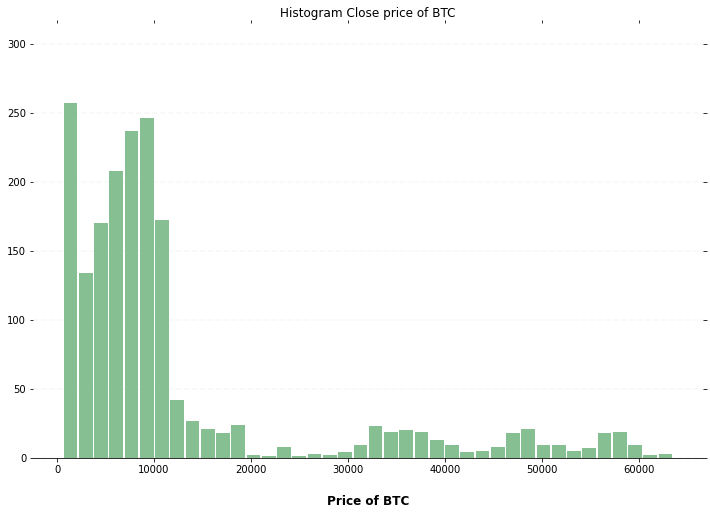

In [ ]:
plot_hist(df,'Value','Price of BTC','', title = 'Histogram Close price of BTC')

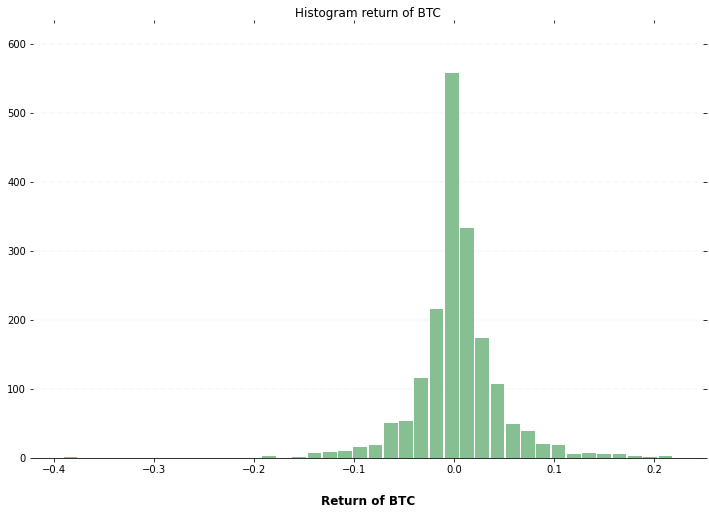

In [ ]:
plot_hist(df,'return_price','Return of BTC','', title = 'Histogram return of BTC')

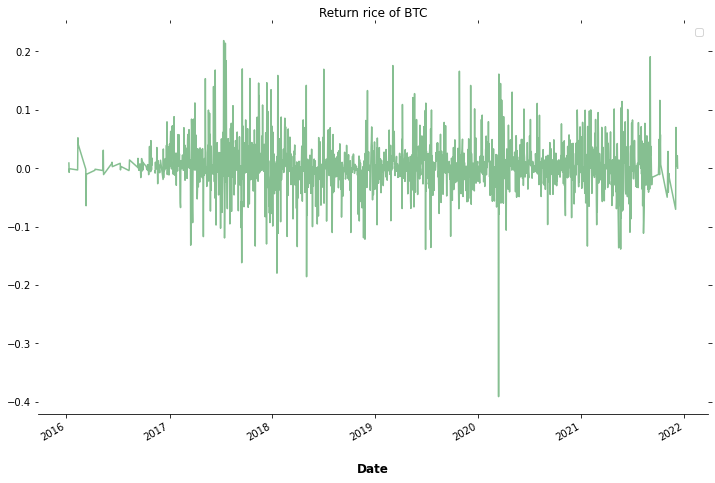

In [ ]:
plot_line(df,'return_price','Date','', "Return rice of BTC")

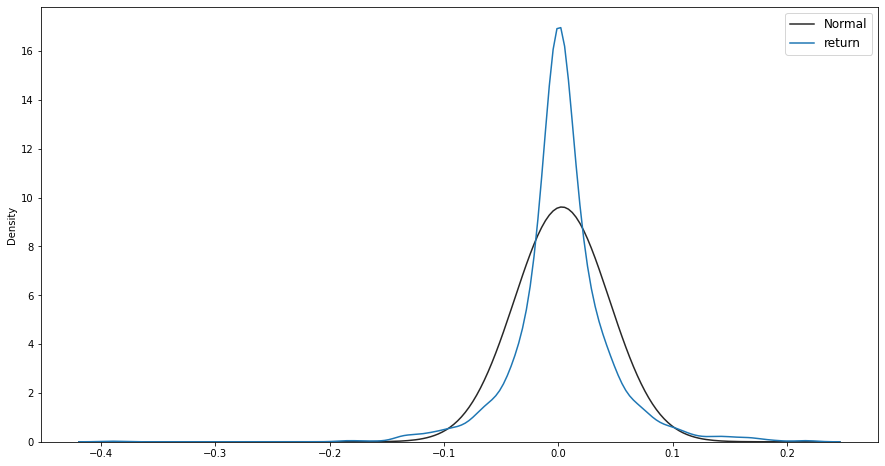

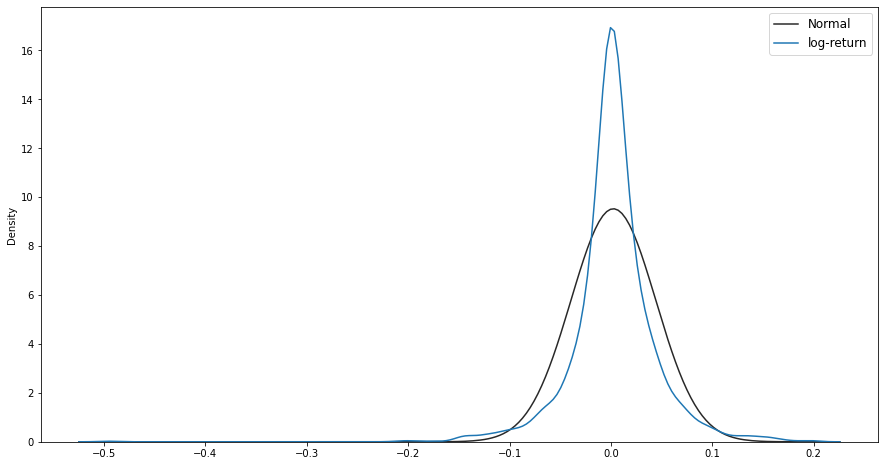

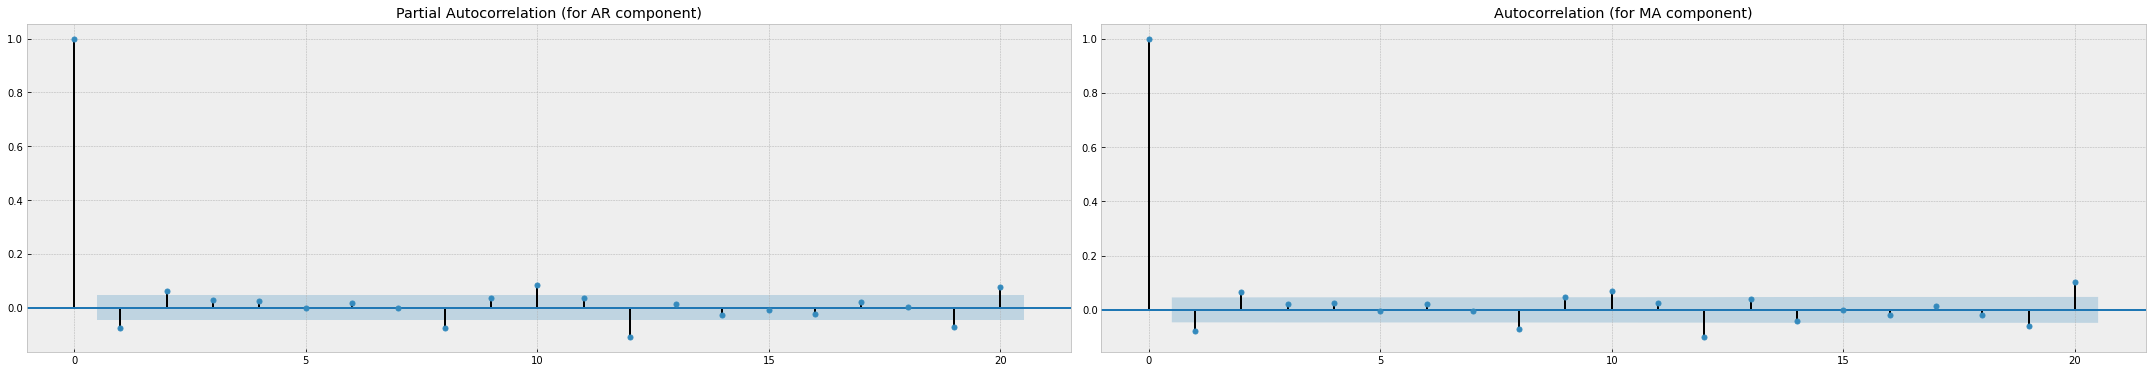

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(df[['return_price']], fit=norm, kde=False, hist=False, label="Normal")
sns.kdeplot(data = df[['return_price']], label="return")
plt.legend(prop={'size': 12})

plt.figure(figsize=(15,8))
sns.distplot(df[['log_return']], fit=norm, kde=False, hist=False, label="Normal")
sns.kdeplot(data = df[['log_return']], label="log-return")
plt.legend(prop={'size': 12})

test_stationarity_acf_pacf_plot(diff_ts(df['Value'], order=1), maxlag=20, figsize=(30,10))

# 3 Properties

## The unit-root property

In [ ]:
result = adfuller(df.Value.dropna(), maxlag=100)
print('ADF Statistic: %.5f' % result[0])
print('p-value: %.5f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.11996
p-value: 0.96740
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


## Visualize Histogram and line plot for close price of each ticket

In [ ]:
df = get_data_of_each_ticker(grouped_df, "AAPL.USUSD")

In [ ]:
df

,Open,High,Low,Close,Volume,Ticker
Date,,,,,,
2017-01-26 00:00:00,121.864,121.864,121.864,121.864,0.0,AAPL.USUSD
2017-01-26 00:05:00,121.864,121.864,121.864,121.864,0.0,AAPL.USUSD
2017-01-26 00:10:00,121.864,121.864,121.864,121.864,0.0,AAPL.USUSD
2017-01-26 00:15:00,121.864,121.864,121.864,121.864,0.0,AAPL.USUSD
2017-01-26 00:20:00,121.864,121.864,121.864,121.864,0.0,AAPL.USUSD
...,...,...,...,...,...,...
2019-08-31 23:35:00,208.327,208.327,208.327,208.327,0.0,AAPL.USUSD
2019-08-31 23:40:00,208.327,208.327,208.327,208.327,0.0,AAPL.USUSD
2019-08-31 23:45:00,208.327,208.327,208.327,208.327,0.0,AAPL.USUSD


In [ ]:
df.describe()

,Value,return_price,log_return,log_price
count,1826.000000,1825.000000,1825.000000,1826.000000
mean,12206.068281,0.003235,0.002363,8.857004
std,14043.891627,0.041487,0.041886,1.106098
min,594.080000,-0.391404,-0.496601,6.387014
25%,3994.982500,-0.012517,-0.012596,8.292794
50%,7924.460000,0.001447,0.001446,8.977709
75%,11084.730000,0.019080,0.018900,9.313324
max,63554.440000,0.218669,0.197759,11.059652


## ADF to check hypothesis of random walk

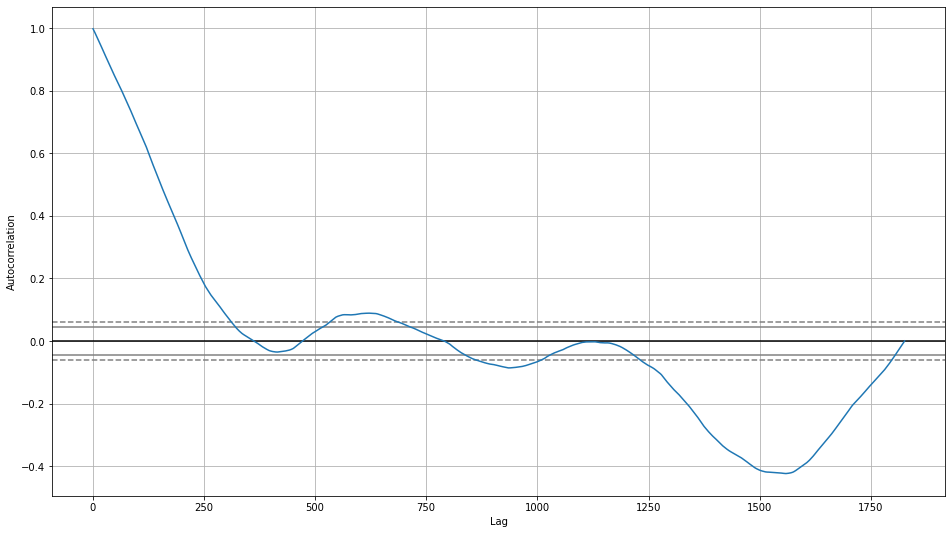

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
pd.plotting.autocorrelation_plot(df['log_price'].values, ax=ax)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

random_walk_hourly = df['log_price'].values

result = adfuller(random_walk_hourly)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.521970
p-value: 0.522616
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


### ADF of price

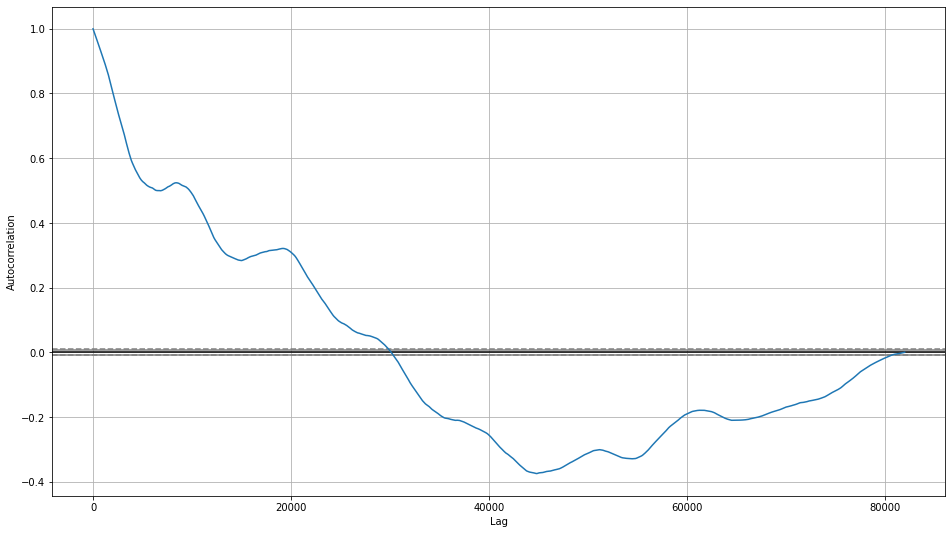

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
pd.plotting.autocorrelation_plot(df_forex['Close'].values, ax=ax)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

random_walk_hourly = df_forex['Close'].values

result = adfuller(random_walk_hourly)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.089869
p-value: 0.248608
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


if Test Statistic < Critical Values => Rejects the null hypothesis.
if Test Statistic >Critical Values => failed to reject the null hypothesis.

The corresponding critical values of the τ1 statistic for the null hypothesis of random walk without drift at levels 1, 5, and 10% with 82,005 observations are −3.434, −2.863 and −2.568 respectively.
hourly: The τ1 statistic is 0.27, and 0.248, for logarithm price series and close price series. At levels 1%, 5%, and 10% we cannot reject the null hypothesis.
null hypothesis that financial prices follow a random walk

In [ ]:
df

,Value,return_price,log_return,log_price
Date,,,,
2016-11-09,621.65,NaN,NaN,6.432377
2016-12-09,609.67,-0.019271,-0.019459,6.412918
2016-09-13,610.92,0.002050,0.002048,6.414966
2016-09-14,608.82,-0.003437,-0.003443,6.411523
2016-09-15,610.38,0.002562,0.002559,6.414082
...,...,...,...,...
2021-06-09,51769.06,0.036472,0.035823,10.854548
2021-07-09,52677.40,0.017546,0.017394,10.871942
2021-08-09,46809.17,-0.111399,-0.118107,10.753834


## Time Series Analysis

### Set up module

In [ ]:
%cd /content/drive/MyDrive/Project/2022 - COMAP

/content/drive/MyDrive/Project/2022 - COMAP


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.3 MB/s 
     |████████████████████████████████| 9.8 MB 32.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install arch
## prophet
!pip install fbprophet
!pip install pystan

     |████████████████████████████████| 902 kB 4.3 MB/s 


In [ ]:
#machine learning
!pip install scikit-learn
!pip install tslearn

     |████████████████████████████████| 793 kB 4.3 MB/s 


### Check timeseries 
- Trend 
- Level
- Outliers
- Stationarity
- Seasonality (define s)

In [ ]:
from ts_utils import *

In [ ]:
ts = df['Value']
ts.head()

Date
2016-11-09    621.65
2016-12-09    609.67
2016-09-13    610.92
2016-09-14    608.82
2016-09-15    610.38
Name: Value, dtype: float64

###### Target Variable

In [ ]:
print("population --> len:", len(ts), "| mean:", round(ts.mean()), " | std:", round(ts.std()))
w = 30
print("moving --> len:", w, " | mean:", round(ts.ewm(span=w).mean()[-1]), " | std:", round(ts.ewm(span=w).std()[-1]))

population --> len: 1826 | mean: 12206  | std: 14044
moving --> len: 30  | mean: 47090  | std: 4166


###### Trend

In [ ]:
def fit_trend_plot(ts, degree=1, plot=True, figsize=(30,10)):
    ## fit trend
    dtf = ts.to_frame(name="ts")
    params = np.polyfit(ts.reset_index().index, ts.values, deg=degree)
    costant = params[-1]    
    dtf["trend"] = costant
    X = np.array(range(1,len(ts)+1))
    for i in range(1,degree+1):
        dtf["trend"] = dtf["trend"] + params[i-1]*(X**i)
        
    ## plot
    if plot is True:
        ax = dtf.plot(grid=True, title="Fitting Trend", figsize=figsize, color=["blue","red"])
        ax.set(xlabel=None)
        plt.show()
    return dtf, params

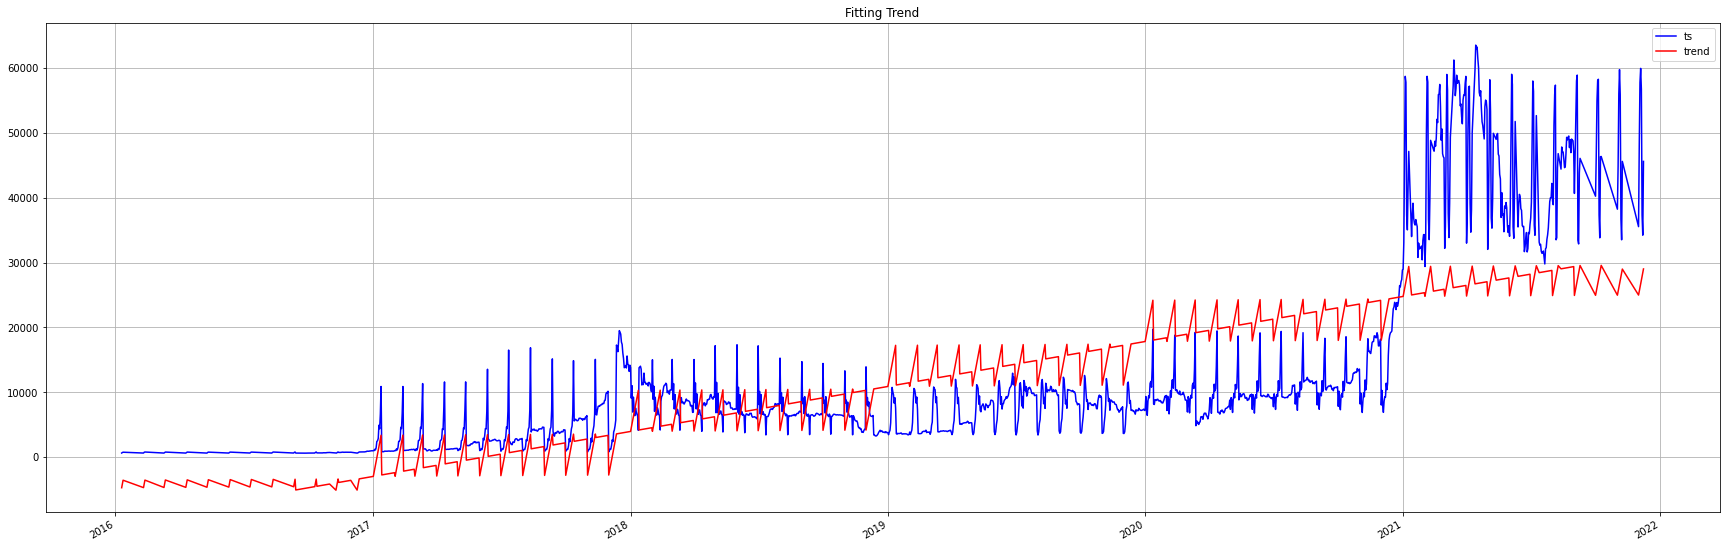

In [ ]:
trend, line = fit_trend_plot(ts, degree=1, plot=True, figsize=(30,10))

In [ ]:
# -> There is a slight trend and it's linear ("additive")
print("constant:", round(line[-1],2), "| slope:", round(line[0],2))

constant: -5137.86 | slope: 19.01


###### Level

In [ ]:
def resistence_support_plot(ts, window=30, trend=False, plot=True, figsize=(15,5)):
    dtf = ts.to_frame(name="ts")
    dtf["max"], dtf["min"] = [np.nan, np.nan]
    rolling = dtf['ts'].rolling(window=window).mean().dropna()  

    ## maxs
    local_max = signal.argrelextrema(rolling.values, np.greater)[0]
    local_max_idx = [dtf.iloc[i-window:i+window]['ts'].idxmax() for i in local_max if (i > window) and (i < len(dtf)-window)]
    dtf["max"].loc[local_max_idx] = dtf["ts"].loc[local_max_idx]

    ## mins
    local_min = signal.argrelextrema(rolling.values, np.less)[0]
    local_min_idx = [dtf.iloc[i-window:i+window]['ts'].idxmin() for i in local_min if (i > window) and (i < len(dtf)-window)]
    dtf["min"].loc[local_min_idx] = dtf["ts"].loc[local_min_idx]

    ## resistence/support
    dtf["resistence"] = dtf["max"].interpolate(method="linear") if trend is True else dtf["max"].fillna(method="ffill")
    dtf["support"] = dtf["min"].interpolate(method="linear") if trend is True else dtf["min"].fillna(method="ffill")
    
    ## plot
    if plot is True:
        ax = dtf["ts"].plot(color="blue", figsize=figsize, grid=True, title="Resistence and Support")
        dtf["resistence"].plot(ax=ax, color="darkviolet", label="resistence", grid=True, linestyle="--")
        dtf["support"].plot(ax=ax, color="green", label="support", grid=True, linestyle="--")
        ax.scatter(x=dtf["max"].index, y=dtf["max"].values, color="darkviolet", label="max")
        ax.scatter(x=dtf["min"].index, y=dtf["min"].values, color="green", label="min")
        ax.set(xlabel=None)
        ax.legend()
        plt.show()
    return dtf

Find local maximun within 15 days - 360 hours

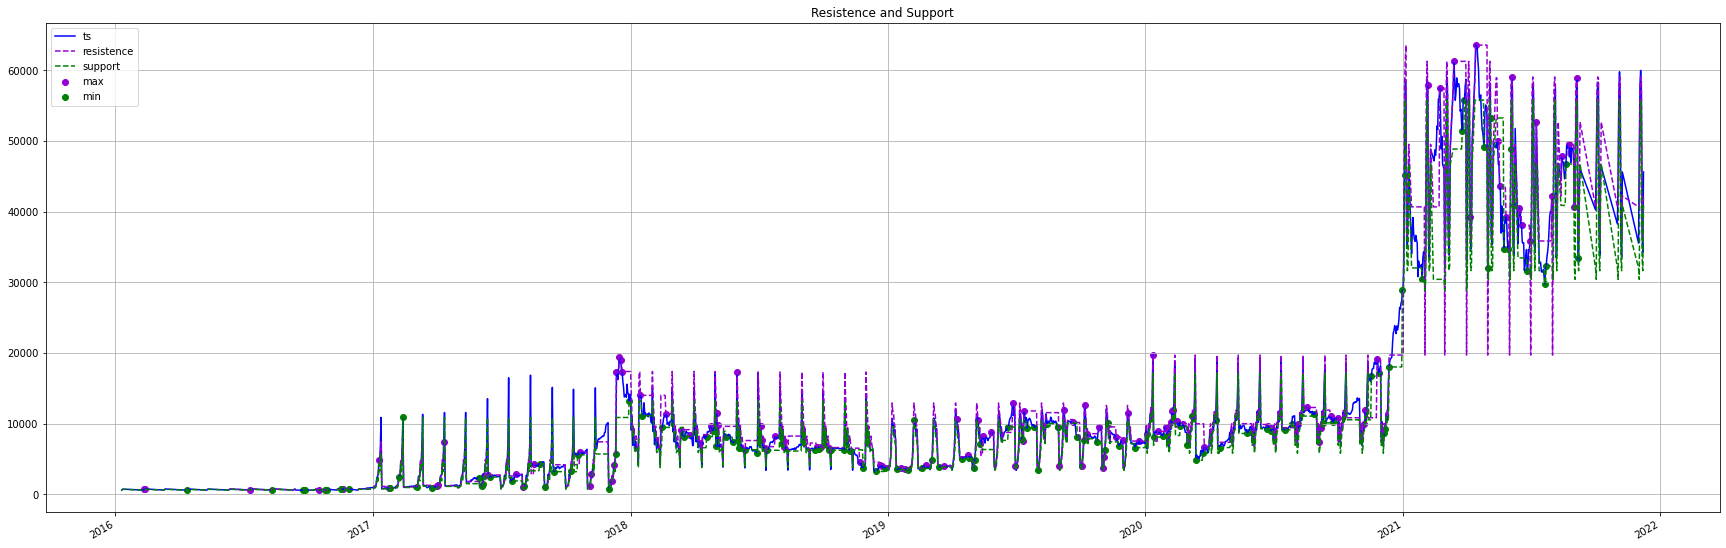

In [ ]:
res_sup = resistence_support_plot(ts, window=7, trend=False, plot=True, figsize=(30,10))

In [ ]:
bool_max_value_series = pd.notnull(res_sup['max'])
res_sup[bool_max_value_series]

,ts,max,min,resistence,support
Date,,,,,
15.01.2008 14:00:00.000,1.49057,1.49057,NaN,1.49057,NaN
17.03.2008 02:00:00.000,1.58632,1.58632,NaN,1.58632,1.52819
16.04.2008 15:00:00.000,1.59758,1.59758,NaN,1.59758,1.53477
22.04.2008 15:00:00.000,1.60091,1.60091,NaN,1.60091,1.53477
23.04.2008 07:00:00.000,1.59742,1.59742,NaN,1.59742,1.53477
...,...,...,...,...,...
21.10.2020 14:00:00.000,1.18737,1.18737,NaN,1.18737,1.16162
09.11.2020 12:00:00.000,1.18939,1.18939,NaN,1.18939,1.16192
06.01.2021 12:00:00.000,1.23401,1.23401,NaN,1.23401,1.20477


In [ ]:
bool_min_value_series = pd.notnull(res_sup['min'])
res_sup[bool_min_value_series]

,ts,max,min,resistence,support
Date,,,,,
22.01.2008 07:00:00.000,1.43833,NaN,1.43833,1.49057,1.43833
21.02.2008 14:00:00.000,1.47346,NaN,1.47346,1.49057,1.47346
26.02.2008 07:00:00.000,1.47841,NaN,1.47841,1.49057,1.47841
26.02.2008 08:00:00.000,1.47965,NaN,1.47965,1.49057,1.47965
26.02.2008 20:00:00.000,1.49623,NaN,1.49623,1.49057,1.49623
...,...,...,...,...,...
28.09.2020 00:00:00.000,1.16162,NaN,1.16162,1.18766,1.16162
04.11.2020 02:00:00.000,1.16192,NaN,1.16192,1.18737,1.16192
30.11.2020 21:00:00.000,1.19256,NaN,1.19256,1.18939,1.19256


In [ ]:
df_temp = df_forex.copy()
df_temp['maximum-within-15days'] = bool_max_value_series.astype(int).values
df_temp['minimum-within-15days'] = bool_min_value_series.astype(int).values

In [ ]:
df_temp[(df_temp['maximum-within-15days']==1) | (df_temp['minimum-within-15days']==1)]

,Open,High,Low,Close,Volume,hourly-return,log_price,maximum-within-15days,minimum-within-15days
Date,,,,,,,,,
15.01.2008 14:00:00.000,1.48922,1.49219,1.48849,1.49057,6.379196e+10,0.000745,0.399159,1,0
22.01.2008 07:00:00.000,1.44216,1.44376,1.43765,1.43833,4.767682e+10,-0.002787,0.363483,0,1
21.02.2008 14:00:00.000,1.47378,1.47415,1.47233,1.47346,6.350100e+10,-0.000380,0.387613,0,1
26.02.2008 07:00:00.000,1.48110,1.48272,1.47761,1.47841,5.577134e+10,-0.001904,0.390967,0,1
26.02.2008 08:00:00.000,1.47845,1.48021,1.47754,1.47965,4.573825e+10,0.000839,0.391806,0,1
...,...,...,...,...,...,...,...,...,...
01.12.2020 19:00:00.000,1.20434,1.20508,1.20426,1.20477,8.504610e+09,0.000357,0.186289,0,1
06.01.2021 12:00:00.000,1.23373,1.23494,1.23298,1.23401,1.081395e+10,0.000219,0.210269,1,0
08.01.2021 13:00:00.000,1.22484,1.22845,1.22341,1.22715,2.420750e+10,0.001870,0.204694,1,0


###### Stationarity

In [ ]:
def test_stationarity_acf_pacf_plot(ts, sample=0.20, maxlag=30, figsize=(30,10)):
    with plt.style.context(style='bmh'):
        ## set figure
        fig = plt.figure(figsize=figsize)
        ts_ax = plt.subplot2grid(shape=(2,2), loc=(0,0), colspan=2)
        pacf_ax = plt.subplot2grid(shape=(2,2), loc=(1,0))
        acf_ax = plt.subplot2grid(shape=(2,2), loc=(1,1))
        
        ## plot ts with mean/std of a sample from the first x% 
        dtf_ts = ts.to_frame(name="ts")
        sample_size = int(len(ts)*sample)
        dtf_ts["mean"] = dtf_ts["ts"].head(sample_size).mean()
        dtf_ts["lower"] = dtf_ts["ts"].head(sample_size).mean() + dtf_ts["ts"].head(sample_size).std()
        dtf_ts["upper"] = dtf_ts["ts"].head(sample_size).mean() - dtf_ts["ts"].head(sample_size).std()
        dtf_ts["ts"].plot(ax=ts_ax, color="blue", legend=False)
        dtf_ts["mean"].plot(ax=ts_ax, legend=False, color="red", linestyle="--", linewidth=0.9)
        ts_ax.fill_between(x=dtf_ts.index, y1=dtf_ts['lower'], y2=dtf_ts['upper'], color='lightskyblue', alpha=0.4)
        dtf_ts["mean"].head(sample_size).plot(ax=ts_ax, legend=False, color="red", linewidth=0.9)
        ts_ax.fill_between(x=dtf_ts.head(sample_size).index, y1=dtf_ts['lower'].head(sample_size), y2=dtf_ts['upper'].head(sample_size), color='lightskyblue')
        ts_ax.set(xlabel=None)

        ## test stationarity (Augmented Dickey-Fuller)
        adfuller_test = sm.tsa.stattools.adfuller(ts, maxlag=maxlag, autolag="AIC")
        adf, p, critical_value = adfuller_test[0], adfuller_test[1], adfuller_test[4]["5%"]
        p = round(p, 3)
        conclusion = "Stationary" if p < 0.05 else "Non-Stationary"
        ts_ax.set_title('Dickey-Fuller Test 95%: '+conclusion+' (p-value: '+str(p)+')')
        
        ## pacf (for AR) e acf (for MA) 
        smt.graphics.plot_pacf(ts, lags=maxlag, ax=pacf_ax, title="Partial Autocorrelation (for AR component)")
        smt.graphics.plot_acf(ts, lags=maxlag, ax=acf_ax, title="Autocorrelation (for MA component)")
        plt.tight_layout()

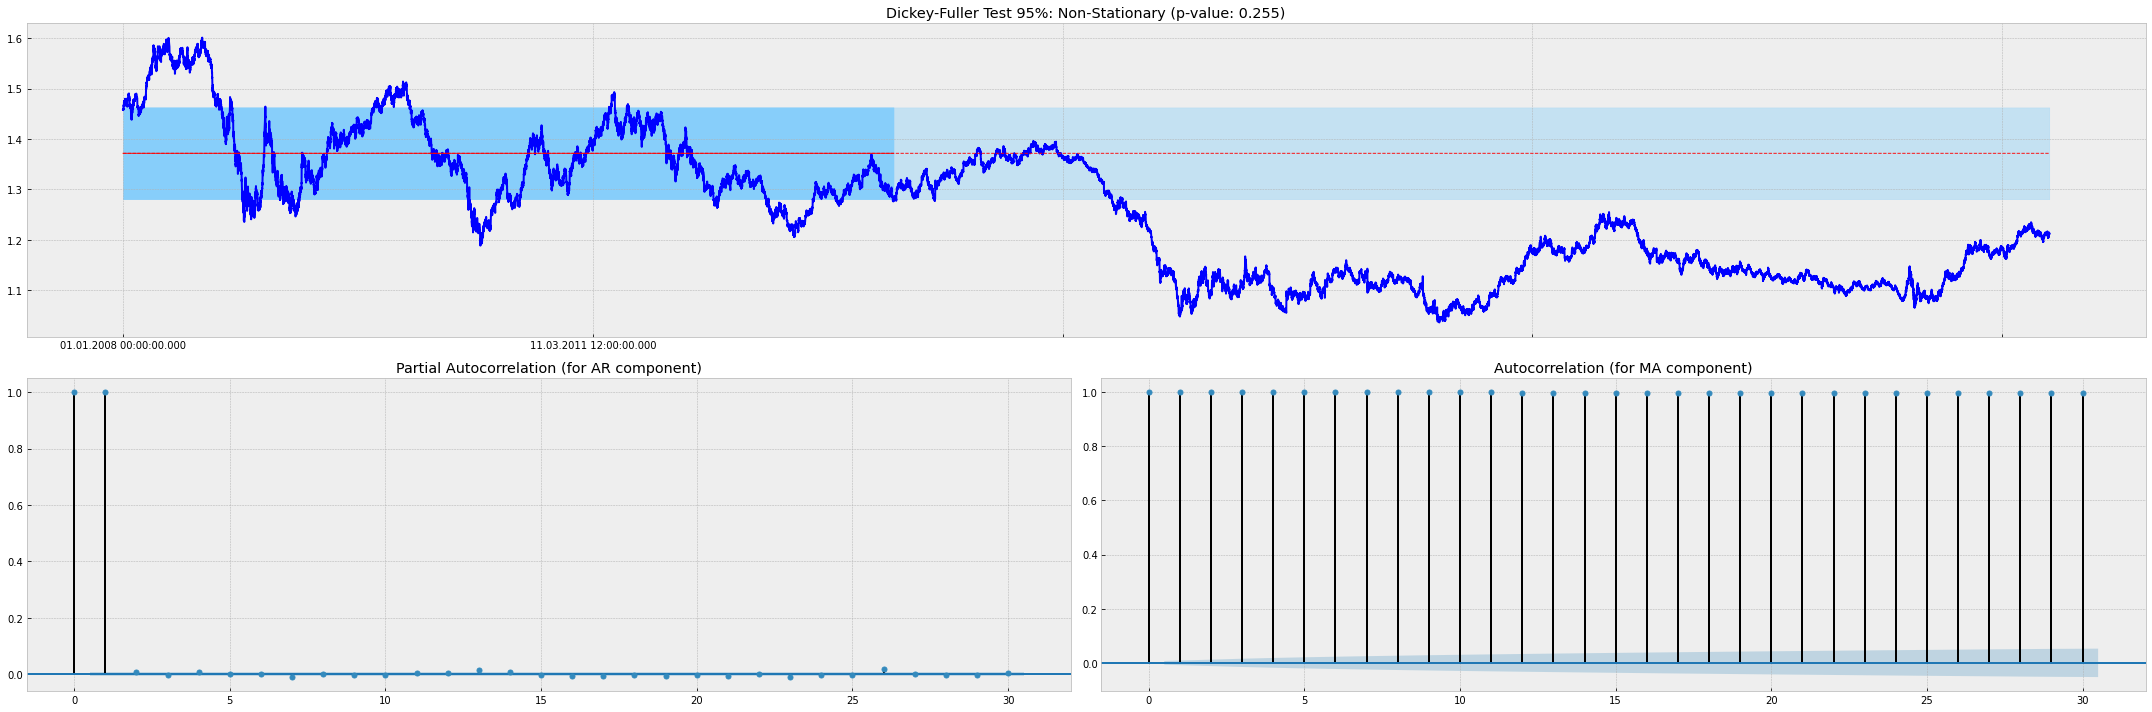

In [ ]:
test_stationarity_acf_pacf_plot(ts, sample=0.40, maxlag=w, figsize=(30,10))

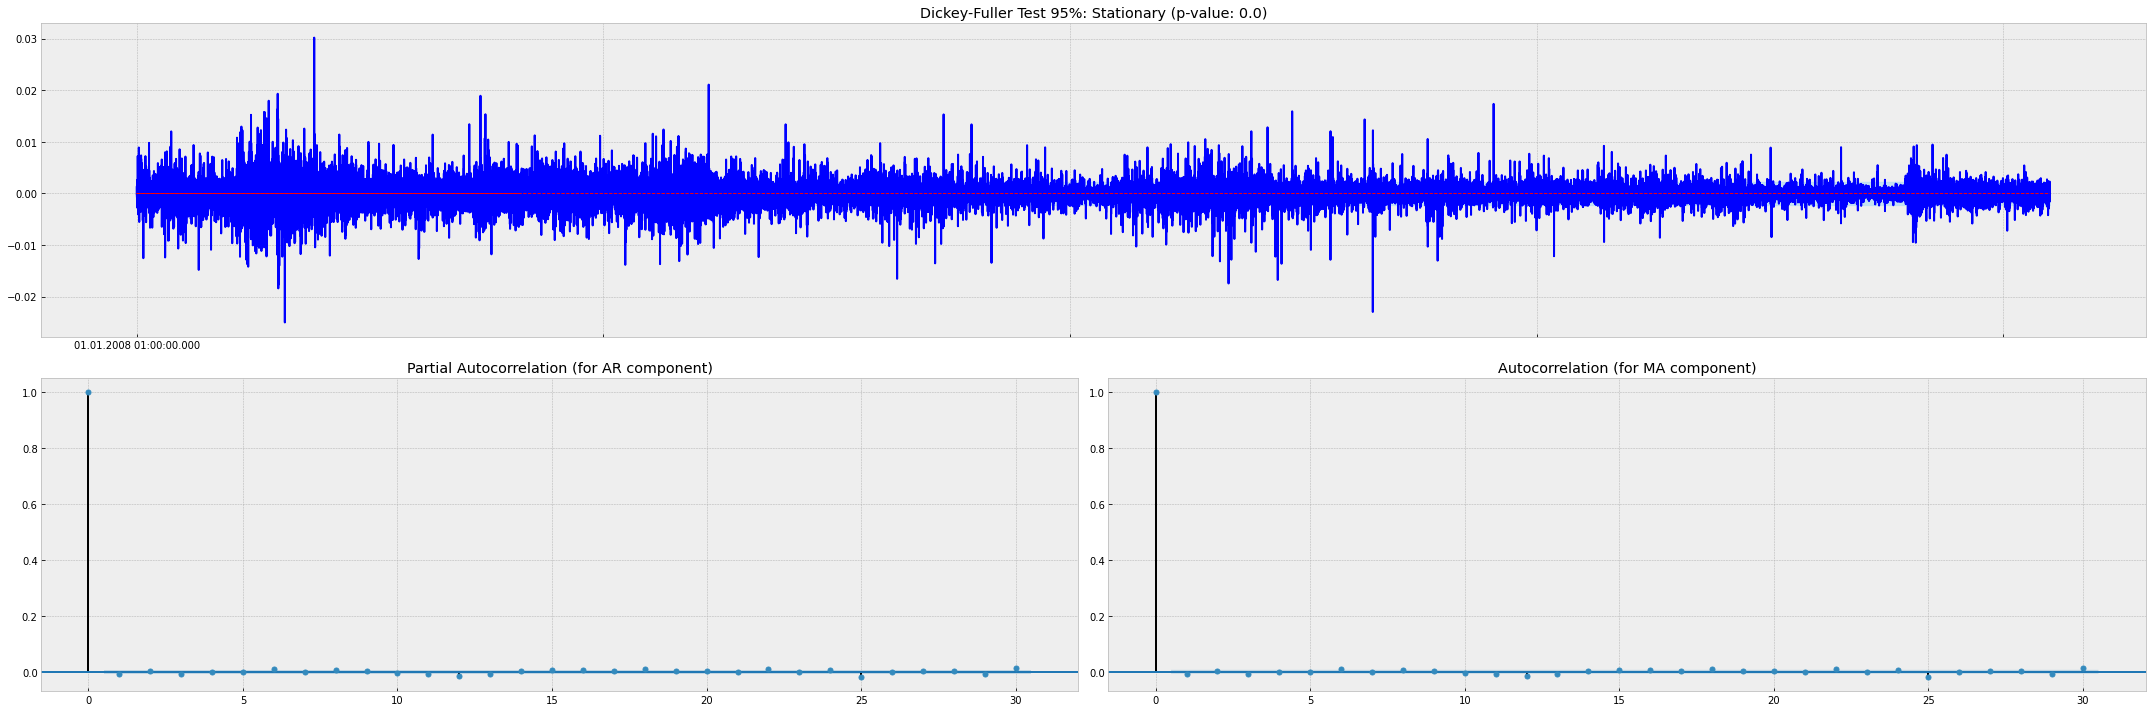

In [ ]:
#depend the test, Close price series not stationary so I differentiating the ts and test again
test_stationarity_acf_pacf_plot(diff_ts(ts, order=1), sample=0.20, maxlag=30, figsize=(30,10))

###### Seasonality

In [ ]:
def decompose_ts_plot(ts, s=7, figsize=(20,13)):
    decomposition = smt.seasonal_decompose(ts, freq=s)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid   
    fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=False, figsize=figsize)
    ax[0].plot(pd.to_datetime(ts.index), ts)
    ax[0].set_title('Original')
    ax[0].grid(True) 
    ax[1].plot(pd.to_datetime(ts.index), trend)
    ax[1].set_title('Trend')
    ax[1].grid(True)  
    ax[2].plot(pd.to_datetime(ts.index), seasonal)
    ax[2].set_title('Seasonality')
    ax[2].grid(True)  
    ax[3].plot(pd.to_datetime(ts.index), residual)
    ax[3].set_title('Residuals')
    ax[3].grid(True)
    return {"trend":trend, "seasonal":seasonal, "residual":residual}

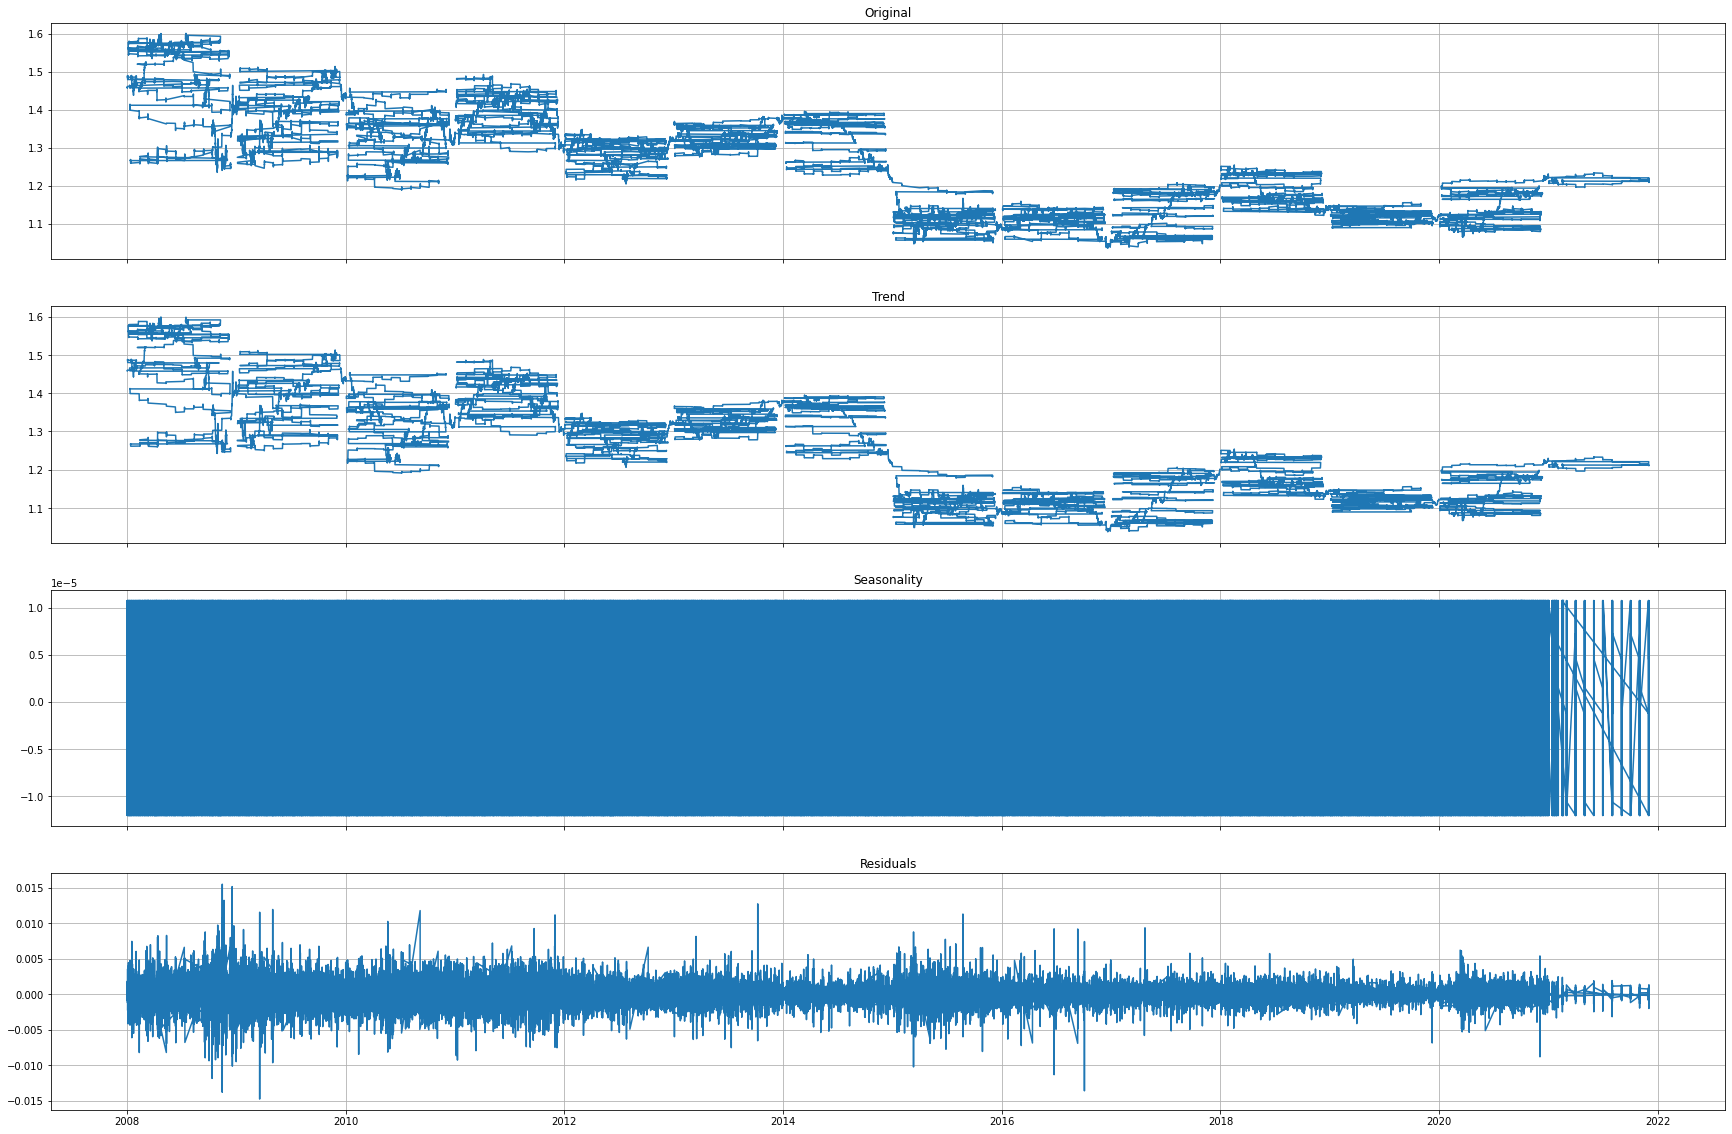

In [ ]:
dic_decomposed = decompose_ts_plot(ts, s=7, figsize=(30,20))